<a href="https://colab.research.google.com/github/hyojk2001/Data-Analysis-Project/blob/main/region_publisher_genre_sales_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

df = pd.read_csv('vgsales.csv')

In [ ]:
df
# df = df[df['Year']]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# 결측치 없애기

df = df.dropna(axis=0)
df.isnull().sum()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# 2020년, 1995년 미만의 데이터 지우기

# 열의 데이터 속성 바꾸기
df = df.astype({'Year':'int'})

# 인덱스 지정
i = df[(df['Year'] < 1995) | (df['Year'] > 2017)].index

# 인덱스를 따라가서 데이터 지우기
df = df.drop(i)

df.Year.unique()

array([2006, 2008, 2009, 1996, 2005, 1999, 2007, 2010, 2013, 2004, 2002,
       2001, 2011, 1998, 2015, 2012, 2014, 1997, 2003, 2000, 1995, 2016,
       2017])

In [ ]:
# 전세계 게임판매량 top5 게임 제조사 

df1 = df[(df['Publisher'] == 'Nintendo') | 
         (df['Publisher'] == 'Electronic Arts') | 
         (df['Publisher'] == 'Activision') | 
         (df['Publisher'] == 'Sony Computer Entertainment') | 
         (df['Publisher'] == 'Ubisoft')]

df1.head()
df1.Year.unique()

array([2006, 2008, 2009, 1996, 2005, 1999, 2007, 2002, 2010, 2001, 2011,
       1998, 2013, 2015, 2012, 2004, 2014, 1997, 2003, 2000, 1995, 2016])

In [ ]:
##########  ##########

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Numbers of sales / Numbers of games per year')

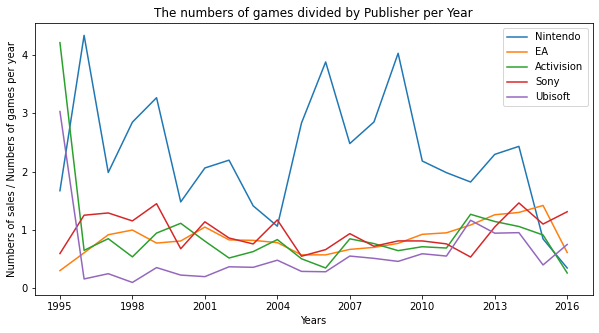

In [ ]:
plt.figure(figsize= (10,5))

# 가장 많은 게임 발매량 회사 TOP3인 닌텐도, NA, 액티비전의 각 연도별 게임 판매수
x_n=df1[df1['Publisher'] == 'Nintendo'].groupby("Year").Global_Sales.sum()
x_e=df1[df1['Publisher'] == 'Electronic Arts'].groupby("Year").Global_Sales.sum()
x_a=df1[df1['Publisher'] == 'Activision'].groupby("Year").Global_Sales.sum()
x_s=df1[df1['Publisher'] == 'Sony Computer Entertainment'].groupby("Year").Global_Sales.sum()
x_u=df1[df1['Publisher'] == 'Ubisoft'].groupby("Year").Global_Sales.sum()

# 각 회사별로 년도별 게임 개발 갯수
nin_sale = df1[df1['Publisher'] == 'Nintendo'].Year.value_counts()
ea_sale = df1[df1['Publisher'] == 'Electronic Arts'].Year.value_counts()
act_sale = df1[df1['Publisher'] == 'Activision'].Year.value_counts()
sony_sale = df1[df1['Publisher'] == 'Sony Computer Entertainment'].Year.value_counts()
ubi_sale = df1[df1['Publisher'] == 'Ubisoft'].Year.value_counts()

# 그 해의 해당게임사 총 판매량 / 그 해의 해당게임사 총 개발게임 갯수 
nintendo = x_n / nin_sale
ea = x_e / ea_sale
activision = x_a / act_sale
sony = x_s / sony_sale
ubisoft = x_u / ubi_sale

b = sns.lineplot(nintendo.index, nintendo.values, label='Nintendo')
b = sns.lineplot(ea.index, ea.values, label='EA')
b = sns.lineplot(activision.index, activision.values, label='Activision')
b = sns.lineplot(sony.index, sony.values, label='Sony')
b = sns.lineplot(ubisoft.index, ubisoft.values, label='Ubisoft')
b.xaxis.set_major_locator(MaxNLocator(integer = True))

plt.title('The numbers of games divided by Publisher per Year')
b.set_xlabel('Years')
b.set_ylabel('Numbers of sales / Numbers of games per year')

In [ ]:
######## 북미에서 각 게임사가 한 해에 게임 당 몇장을 팔았는지 ########

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Numbers of sales / Numbers of games per year')

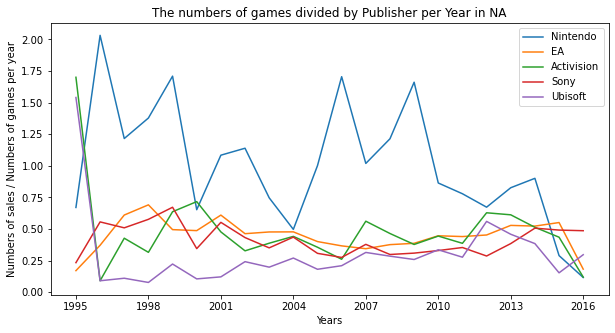

In [ ]:
plt.figure(figsize= (10,5))

# 가장 많은 게임 발매량 회사 TOP3인 닌텐도, NA, 액티비전의 각 연도별 게임 판매수
x_n=df1[df1['Publisher'] == 'Nintendo'].groupby("Year").NA_Sales.sum()
x_e=df1[df1['Publisher'] == 'Electronic Arts'].groupby("Year").NA_Sales.sum()
x_a=df1[df1['Publisher'] == 'Activision'].groupby("Year").NA_Sales.sum()
x_s=df1[df1['Publisher'] == 'Sony Computer Entertainment'].groupby("Year").NA_Sales.sum()
x_u=df1[df1['Publisher'] == 'Ubisoft'].groupby("Year").NA_Sales.sum()

# 각 회사별로 년도별 게임 개발 갯수
nin_sale = df1[df1['Publisher'] == 'Nintendo'].Year.value_counts()
ea_sale = df1[df1['Publisher'] == 'Electronic Arts'].Year.value_counts()
act_sale = df1[df1['Publisher'] == 'Activision'].Year.value_counts()
sony_sale = df1[df1['Publisher'] == 'Sony Computer Entertainment'].Year.value_counts()
ubi_sale = df1[df1['Publisher'] == 'Ubisoft'].Year.value_counts()

# 그 해의 해당게임사 총 판매량 / 그 해의 해당게임사 총 개발게임 갯수 
# 즉, 한 해에 해당 게임사가 게임당 평균 몇 장을 팔았는지
nintendo = x_n / nin_sale
ea = x_e / ea_sale
activision = x_a / act_sale
sony = x_s / sony_sale
ubisoft = x_u / ubi_sale

b = sns.lineplot(nintendo.index, nintendo.values, label='Nintendo')
b = sns.lineplot(ea.index, ea.values, label='EA')
b = sns.lineplot(activision.index, activision.values, label='Activision')
b = sns.lineplot(sony.index, sony.values, label='Sony')
b = sns.lineplot(ubisoft.index, ubisoft.values, label='Ubisoft')
b.xaxis.set_major_locator(MaxNLocator(integer = True))

plt.title('The numbers of games divided by Publisher per Year in NA')
b.set_xlabel('Years')
b.set_ylabel('Numbers of sales / Numbers of games per year')

In [ ]:
########## 1년당 유럽에서 각 게임사가 게임 당 판매한 평균 ###########

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Numbers of sales / Numbers of games per year')

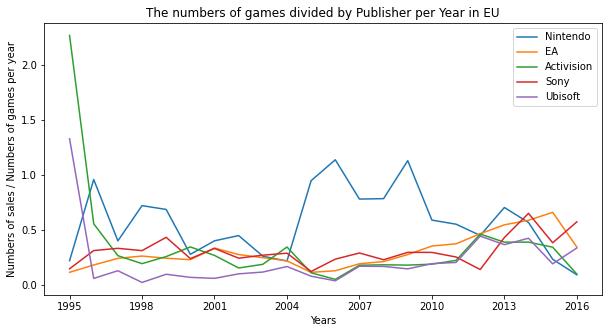

In [ ]:
plt.figure(figsize= (10,5))

# 가장 많은 게임 발매량 회사 TOP3인 닌텐도, NA, 액티비전의 각 연도별 게임 판매수
x_n=df1[df1['Publisher'] == 'Nintendo'].groupby("Year").EU_Sales.sum()
x_e=df1[df1['Publisher'] == 'Electronic Arts'].groupby("Year").EU_Sales.sum()
x_a=df1[df1['Publisher'] == 'Activision'].groupby("Year").EU_Sales.sum()
x_s=df1[df1['Publisher'] == 'Sony Computer Entertainment'].groupby("Year").EU_Sales.sum()
x_u=df1[df1['Publisher'] == 'Ubisoft'].groupby("Year").EU_Sales.sum()

# 각 회사별로 년도별 게임 개발 갯수
nin_sale = df1[df1['Publisher'] == 'Nintendo'].Year.value_counts()
ea_sale = df1[df1['Publisher'] == 'Electronic Arts'].Year.value_counts()
act_sale = df1[df1['Publisher'] == 'Activision'].Year.value_counts()
sony_sale = df1[df1['Publisher'] == 'Sony Computer Entertainment'].Year.value_counts()
ubi_sale = df1[df1['Publisher'] == 'Ubisoft'].Year.value_counts()

# 그 해의 해당게임사 총 판매량 / 그 해의 해당게임사 총 개발게임 갯수 
# 즉, 한 해에 해당 게임사가 게임당 평균 몇 장을 팔았는지
nintendo = x_n / nin_sale
ea = x_e / ea_sale
activision = x_a / act_sale
sony = x_s / sony_sale
ubisoft = x_u / ubi_sale

b = sns.lineplot(nintendo.index, nintendo.values, label='Nintendo')
b = sns.lineplot(ea.index, ea.values, label='EA')
b = sns.lineplot(activision.index, activision.values, label='Activision')
b = sns.lineplot(sony.index, sony.values, label='Sony')
b = sns.lineplot(ubisoft.index, ubisoft.values, label='Ubisoft')
b.xaxis.set_major_locator(MaxNLocator(integer = True))

plt.title('The numbers of games divided by Publisher per Year in EU')
b.set_xlabel('Years')
b.set_ylabel('Numbers of sales / Numbers of games per year')

In [ ]:
########## 1년당 일본에서 각 게임사가 게임 당 판매한 평균 ###########

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Numbers of sales / Numbers of games per year')

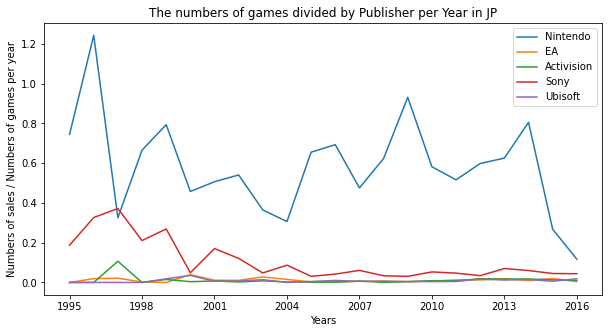

In [ ]:
plt.figure(figsize= (10,5))

# 가장 많은 게임 발매량 회사 TOP3인 닌텐도, NA, 액티비전의 각 연도별 게임 판매수
x_n=df1[df1['Publisher'] == 'Nintendo'].groupby("Year").JP_Sales.sum()
x_e=df1[df1['Publisher'] == 'Electronic Arts'].groupby("Year").JP_Sales.sum()
x_a=df1[df1['Publisher'] == 'Activision'].groupby("Year").JP_Sales.sum()
x_s=df1[df1['Publisher'] == 'Sony Computer Entertainment'].groupby("Year").JP_Sales.sum()
x_u=df1[df1['Publisher'] == 'Ubisoft'].groupby("Year").JP_Sales.sum()

# 각 회사별로 년도별 게임 개발 갯수
nin_sale = df1[df1['Publisher'] == 'Nintendo'].Year.value_counts()
ea_sale = df1[df1['Publisher'] == 'Electronic Arts'].Year.value_counts()
act_sale = df1[df1['Publisher'] == 'Activision'].Year.value_counts()
sony_sale = df1[df1['Publisher'] == 'Sony Computer Entertainment'].Year.value_counts()
ubi_sale = df1[df1['Publisher'] == 'Ubisoft'].Year.value_counts()

# 그 해의 해당게임사 총 판매량 / 그 해의 해당게임사 총 개발게임 갯수 
# 즉, 한 해에 해당 게임사가 게임당 평균 몇 장을 팔았는지
nintendo = x_n / nin_sale
ea = x_e / ea_sale
activision = x_a / act_sale
sony = x_s / sony_sale
ubisoft = x_u / ubi_sale

b = sns.lineplot(nintendo.index, nintendo.values, label='Nintendo')
b = sns.lineplot(ea.index, ea.values, label='EA')
b = sns.lineplot(activision.index, activision.values, label='Activision')
b = sns.lineplot(sony.index, sony.values, label='Sony')
b = sns.lineplot(ubisoft.index, ubisoft.values, label='Ubisoft')
b.xaxis.set_major_locator(MaxNLocator(integer = True))

plt.title('The numbers of games divided by Publisher per Year in JP')
b.set_xlabel('Years')
b.set_ylabel('Numbers of sales / Numbers of games per year')

In [ ]:
########## 1년당 그 외 기타지역 에서 각 게임사가 게임 당 판매한 평균 ###########

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Numbers of sales / Numbers of games per year')

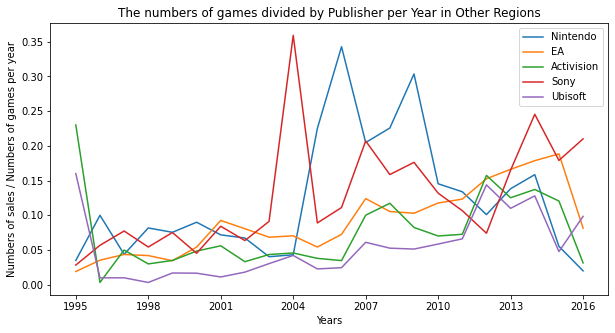

In [ ]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize= (10,5))

# 가장 많은 게임 발매량 회사 TOP3인 닌텐도, NA, 액티비전의 각 연도별 게임 판매수
x_n=df1[df1['Publisher'] == 'Nintendo'].groupby("Year").Other_Sales.sum()
x_e=df1[df1['Publisher'] == 'Electronic Arts'].groupby("Year").Other_Sales.sum()
x_a=df1[df1['Publisher'] == 'Activision'].groupby("Year").Other_Sales.sum()
x_s=df1[df1['Publisher'] == 'Sony Computer Entertainment'].groupby("Year").Other_Sales.sum()
x_u=df1[df1['Publisher'] == 'Ubisoft'].groupby("Year").Other_Sales.sum()

# 각 회사별로 년도별 게임 개발 갯수
nin_sale = df1[df1['Publisher'] == 'Nintendo'].Year.value_counts()
ea_sale = df1[df1['Publisher'] == 'Electronic Arts'].Year.value_counts()
act_sale = df1[df1['Publisher'] == 'Activision'].Year.value_counts()
sony_sale = df1[df1['Publisher'] == 'Sony Computer Entertainment'].Year.value_counts()
ubi_sale = df1[df1['Publisher'] == 'Ubisoft'].Year.value_counts()

# 그 해의 해당게임사 총 판매량 / 그 해의 해당게임사 총 개발게임 갯수 
# 즉, 한 해에 해당 게임사가 게임당 평균 몇 장을 팔았는지
nintendo = x_n / nin_sale
ea = x_e / ea_sale
activision = x_a / act_sale
sony = x_s / sony_sale
ubisoft = x_u / ubi_sale

b = sns.lineplot(nintendo.index, nintendo.values, label='Nintendo')
b = sns.lineplot(ea.index, ea.values, label='EA')
b = sns.lineplot(activision.index, activision.values, label='Activision')
b = sns.lineplot(sony.index, sony.values, label='Sony')
b = sns.lineplot(ubisoft.index, ubisoft.values, label='Ubisoft')
b.xaxis.set_major_locator(MaxNLocator(integer = True))

plt.title('The numbers of games divided by Publisher per Year in Other Regions')
b.set_xlabel('Years')
b.set_ylabel('Numbers of sales / Numbers of games per year')

In [ ]:
########################################################################